# Searcher Feature
## Query for Comments & Visualize Ratings Over Time

This feature allows users to type a query below and search for relevant comments in the dataset. The TripAdvisor rating per each guest is then used to plot a rating trend relative to the query over time.

Instructions:
1. Update `query_text` string to query you wish to search for in the TripAdivsor comments.
2. Make sure that you have the appropriate dataset name set in the `config.toml` file.

## Inputs & Setup

In [169]:
import metapy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates
%matplotlib inline
import seaborn as sns
import numpy as np


# Input variables
query_text = "price expensive cost cheap money"

## Query the data and create a dataframe for visualizing relevant queries

In [170]:
%%capture
# Create inverted index for searching
idx = metapy.index.make_inverted_index('config.toml')

# Set up ranker & query
ranker = metapy.index.OkapiBM25() # Change this to change ranker
query = metapy.index.Document()
query.content(query_text) 

top_docs = ranker.score(idx, query, num_results=100)


# Create empty dataframe to hold relevant reviews
reviews_df = pd.DataFrame(columns = ['review_id', 'venue_name', 'review_date', 'content',
                                 'rating', 'helpful_vote', 'user_location', 'query_relevance'])

for num, (d_id, score) in enumerate(top_docs):
    
    if type(idx.metadata(d_id).get('review_id')):
        
        print(d_id)
        
        row = {
        'review_id' : str(idx.metadata(d_id).get('review_id')),
        'venue_name' : str(idx.metadata(d_id).get('venue_name')),
        'review_date' : str(idx.metadata(d_id).get('review_date')),
        'content' : str(idx.metadata(d_id).get('content')),
        'rating' : str(idx.metadata(d_id).get('rating')),
        'helpful_vote' : str(idx.metadata(d_id).get('helpful_vote')),
        'user_location' : str(idx.metadata(d_id).get('user_location')),
        'query_relevance' : score
        }

        reviews_df = reviews_df.append(row, ignore_index=True)

In [171]:
reviews_df

,review_id,venue_name,review_date,content,rating,helpful_vote,user_location,query_relevance
0,265132668,Three Broomsticks,"April 11, 2015",Not surprising for a theme park the cost and f...,40,33,"Leighton Buzzard, United Kingdom\r",11.551554
1,124987883,Three Broomsticks,"February 21, 2012","Crazy long line to get in, and not a good lay-...",40,102,"Chicago, Illinois\r",10.019854
2,175544765,Three Broomsticks,"September 3, 2013",Three Broomsticks is an excellent value for th...,40,54,"Oklahoma City, Oklahoma\r",9.681990
3,393228133,Three Broomsticks,"July 16, 2016","We had breakfast here, it was included in our ...",50,29,Indianapolis\r,9.383439
4,273569103,Three Broomsticks,"May 21, 2015",All of the food in a theme park is going to be...,50,12,"Kingsport, Tennessee\r",8.502495
5,333397309,Three Broomsticks,"December 16, 2015",The food isn't cheap but not expensive. About ...,50,96,"Appleton, Wisconsin\r",8.017194
6,477751645,Three Broomsticks,"April 21, 2017","""You spend quite a bit on the food in the Wiza...",20,6,\r,7.632181
7,308798611,Three Broomsticks,"September 9, 2015",My family went for breakfast. There was a sele...,50,43,"Coopersburg, Pennsylvania\r",7.615211
8,275724764,Three Broomsticks,"May 30, 2015","For a theme park, we thought the food here was...",40,63,"Redding, Connecticut\r",7.557929
9,417854376,Three Broomsticks,"September 13, 2016",We felt the food was over priced and cold. The...,20,33,Windsor\r,7.479762


In [172]:
# Convert & clean up data
reviews_df['rating'] = reviews_df['rating'].fillna(0)
reviews_df['rating']  = reviews_df['rating'].astype(int) / 10 # A 5 star rating is stored on TripAdvisor as 50
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'], format='%B %d, %Y')
reviews_df['date_num'] = dates.datestr2num(reviews_df['review_date'].astype(str))
reviews_df['user_location'] = reviews_df['user_location'].str.strip('\r')

## Visualize Query-Relevant Ratings Trend Over Time

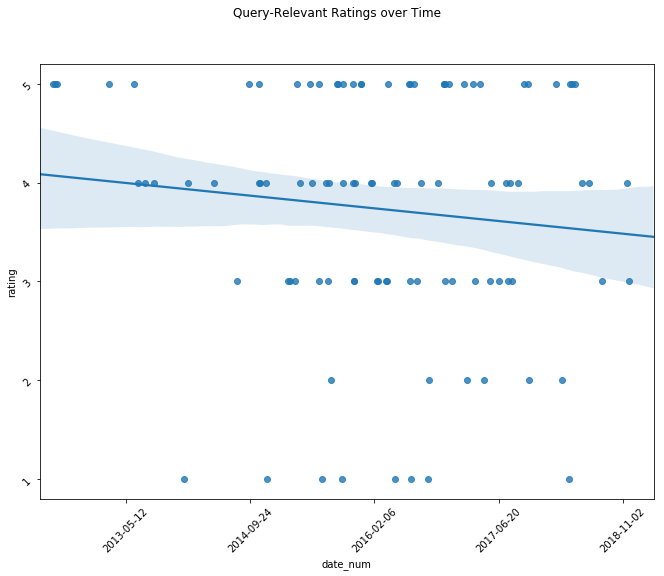

In [173]:
# Formatting the output for visualization of ratings over time
@plt.FuncFormatter
def formatted_dates(x, pos):
    return dates.num2date(x).strftime('%Y-%m-%d')

fig, ax = plt.subplots()
fig.suptitle('Query-Relevant Ratings over Time')
fig.set_size_inches(11, 8)

plt.yticks([1,2,3,4,5])
plt.ylabel('Review Rating')
plt.ylim(.8,5.2) # ratings can be between 1 and 5

plt.xlim(reviews_df['date_num'].min()+100, reviews_df['date_num'].max()+100) # changes based on date range of reviews
plt.xlabel('Review Date')

# just use regplot if you don't need a FacetGrid
sns.regplot('date_num', 'rating', data=reviews_df, ax=ax)

# here's the magic:
ax.xaxis.set_major_formatter(formatted_dates)

# legible labels
ax.tick_params(labelrotation=45)